<a href="https://colab.research.google.com/github/dozkanpython/colab_fatal_force_analysis/blob/master/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print("Shape of df_data:", df_hh_income.shape)
print("Shape of df_data:", df_pct_poverty.shape)
print("Shape of df_data:", df_pct_completed_hs.shape)
print("Shape of df_data:", df_share_race_city.shape)
print("Shape of df_data:", df_fatalities.shape)

Shape of df_data: (29322, 3)
Shape of df_data: (29329, 3)
Shape of df_data: (29329, 3)
Shape of df_data: (29268, 7)
Shape of df_data: (2535, 14)


In [7]:
column_names = df_hh_income.columns.tolist()
print("Column names:", column_names)

column_names = df_pct_poverty.columns.tolist()
print("Column names:", column_names)

column_names = df_pct_completed_hs.columns.tolist()
print("Column names:", column_names)

column_names = df_share_race_city.columns.tolist()
print("Column names:", column_names)

column_names = df_fatalities.columns.tolist()
print("Column names:", column_names)

Column names: ['Geographic Area', 'City', 'Median Income']
Column names: ['Geographic Area', 'City', 'poverty_rate']
Column names: ['Geographic Area', 'City', 'percent_completed_hs']
Column names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Column names: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [11]:
h_nan_values = df_hh_income.isna().any()
print("House Hold income NaN values:\n", h_nan_values)

p_nan_values = df_pct_poverty.isna().any()
print("Poverty NaN values:\n", p_nan_values)

c_nan_values = df_pct_completed_hs.isna().any()
print("Completed NaN values:\n", c_nan_values)

r_nan_values = df_share_race_city.isna().any()
print("Race NaN values:\n", r_nan_values)

f_nan_values = df_fatalities.isna().any()
print("Fatalities NaN values:\n", f_nan_values)

House Hold income NaN values:
 Geographic Area    False
City               False
Median Income       True
dtype: bool
Poverty NaN values:
 Geographic Area    False
City               False
poverty_rate       False
dtype: bool
Completed NaN values:
 Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool
Race NaN values:
 Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool
Fatalities NaN values:
 id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level   

In [15]:
duplicate_rows = df_hh_income.duplicated().any()
print("House Hold income Number of duplicate rows:", duplicate_rows)

duplicate_rows = df_pct_poverty.duplicated().sum()
print("Poverty Number of duplicate rows:", duplicate_rows)

duplicate_rows = df_pct_completed_hs.duplicated().sum()
print("Completed Number of duplicate rows:", duplicate_rows)

duplicate_rows = df_share_race_city.duplicated().sum()
print("Race Number of duplicate rows:", duplicate_rows)

duplicate_rows = df_fatalities.duplicated().sum()
print("Fatalities Number of duplicate rows:", duplicate_rows)

House Hold income Number of duplicate rows: False
Poverty Number of duplicate rows: 0
Completed Number of duplicate rows: 0
Race Number of duplicate rows: 0
Fatalities Number of duplicate rows: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [17]:
clean_df_hh_income = df_hh_income['Median Income'].fillna(0)

clean_df_fatalities = df_fatalities.fillna(0)

In [18]:
clean_df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [27]:
df_pct_poverty = df_pct_poverty.replace('-', 0)

In [28]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])


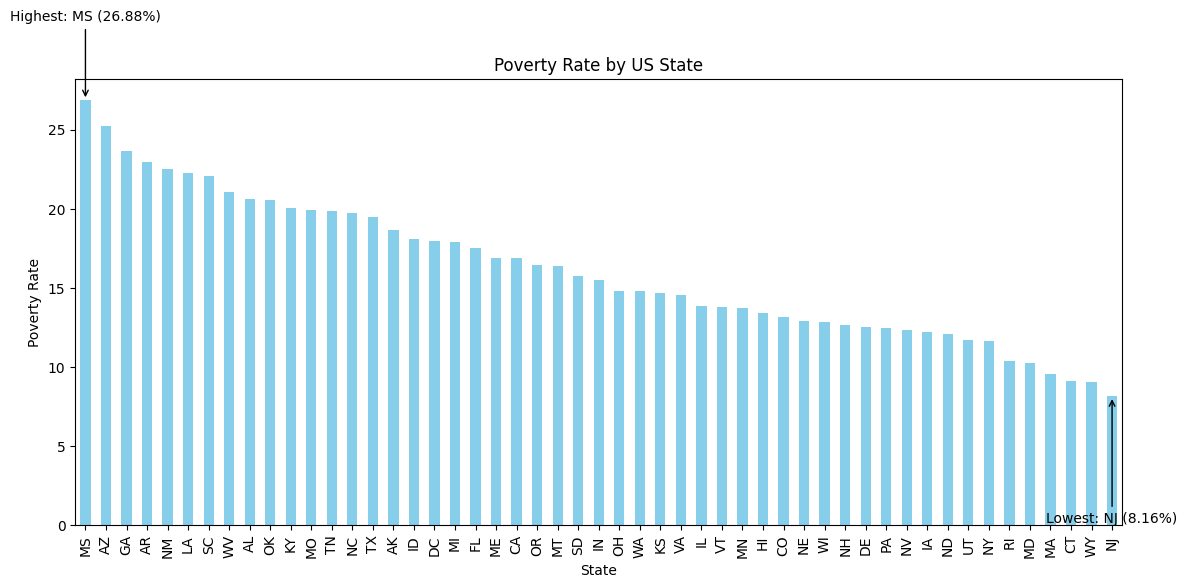

In [29]:
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_poverty.plot(kind='bar', color='skyblue')
plt.title('Poverty Rate by US State')
plt.xlabel('State')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=90)


highest_poverty_state = state_poverty.idxmax()
lowest_poverty_state = state_poverty.idxmin()
highest_poverty_rate = state_poverty.max()
lowest_poverty_rate = state_poverty.min()

plt.annotate(f'Highest: {highest_poverty_state} ({highest_poverty_rate:.2f}%)',
             xy=(state_poverty.index.get_loc(highest_poverty_state), highest_poverty_rate),
             xytext=(state_poverty.index.get_loc(highest_poverty_state), highest_poverty_rate + 5),
             ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Lowest: {lowest_poverty_state} ({lowest_poverty_rate:.2f}%)',
             xy=(state_poverty.index.get_loc(lowest_poverty_state), lowest_poverty_rate),
             xytext=(state_poverty.index.get_loc(lowest_poverty_state), lowest_poverty_rate - 8),
             ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

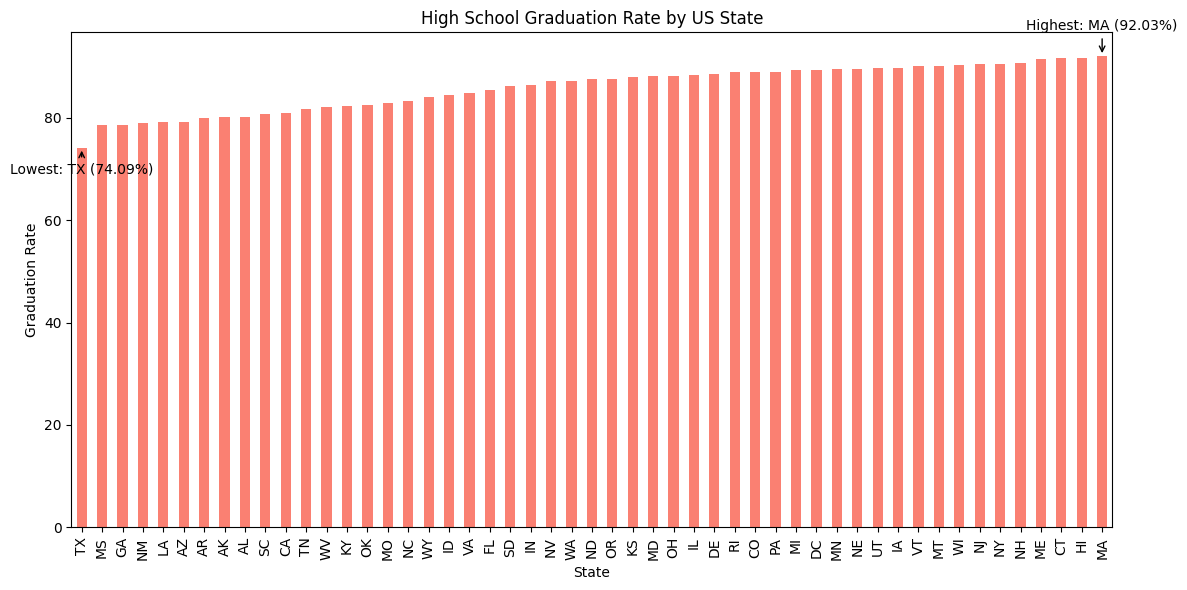

In [30]:
df_pct_completed_hs = df_pct_completed_hs.replace('-', 0)
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

state_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()


plt.figure(figsize=(12, 6))
state_graduation.plot(kind='bar', color='salmon')
plt.title('High School Graduation Rate by US State')
plt.xlabel('State')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=90)

lowest_graduation_state = state_graduation.idxmin()
highest_graduation_state = state_graduation.idxmax()
lowest_graduation_rate = state_graduation.min()
highest_graduation_rate = state_graduation.max()

plt.annotate(f'Lowest: {lowest_graduation_state} ({lowest_graduation_rate:.2f}%)',
             xy=(state_graduation.index.get_loc(lowest_graduation_state), lowest_graduation_rate),
             xytext=(state_graduation.index.get_loc(lowest_graduation_state), lowest_graduation_rate - 5),
             ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Highest: {highest_graduation_state} ({highest_graduation_rate:.2f}%)',
             xy=(state_graduation.index.get_loc(highest_graduation_state), highest_graduation_rate),
             xytext=(state_graduation.index.get_loc(highest_graduation_state), highest_graduation_rate + 5),
             ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

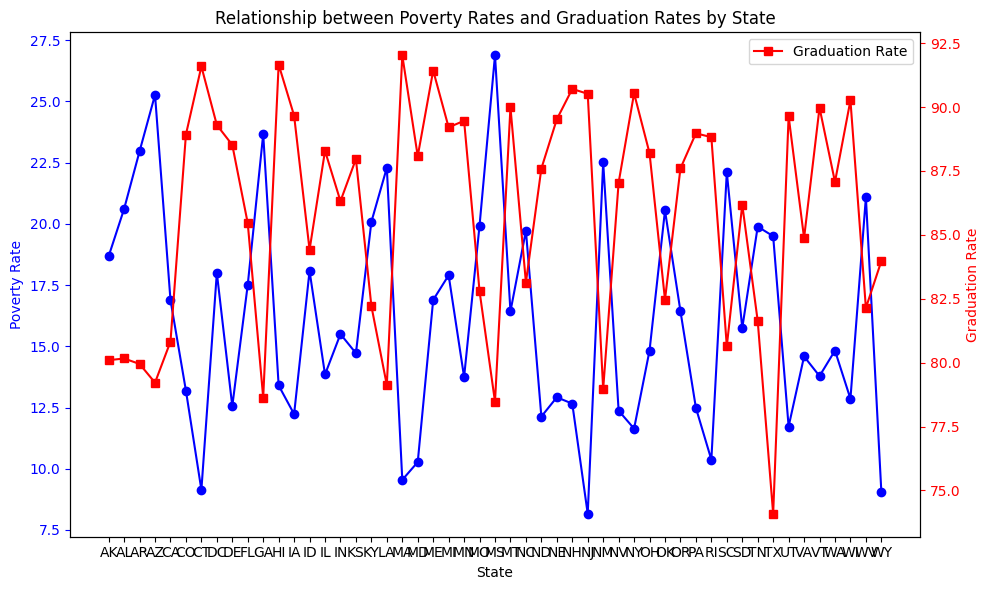

In [31]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])


state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_index()
state_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_index()


fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(state_poverty.index, state_poverty.values, 'b-', marker='o', label='Poverty Rate')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(state_graduation.index, state_graduation.values, 'r-', marker='s', label='Graduation Rate')
ax2.set_ylabel('Graduation Rate', color='r')
ax2.tick_params('y', colors='r')

plt.title('Relationship between Poverty Rates and Graduation Rates by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [37]:
merged_df = pd.merge(df_pct_poverty, df_pct_completed_hs, on=('City','Geographic Area') )

In [38]:
merged_df.head()

,Geographic Area,City,poverty_rate,percent_completed_hs
0,AL,Abanda CDP,78.80,21.20
1,AL,Abbeville city,29.10,69.10
2,AL,Adamsville city,25.50,78.90
3,AL,Addison town,30.70,81.40
4,AL,Akron town,42.00,68.60


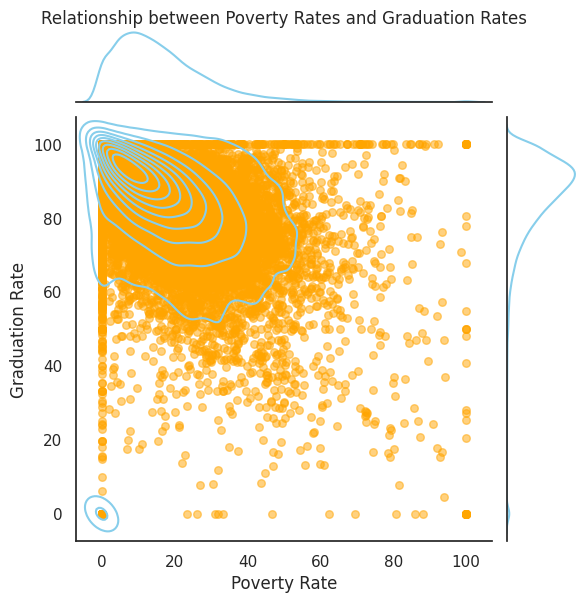

In [42]:


merged_df['poverty_rate'] = pd.to_numeric(merged_df['poverty_rate'])
merged_df['percent_completed_hs'] = pd.to_numeric(merged_df['percent_completed_hs'])

sns.set(style="white", color_codes=True)
g = sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, kind='kde', color='skyblue')
g.plot_joint(plt.scatter, c="orange", s=30, linewidth=1, marker="o", alpha=0.5)
g.set_axis_labels("Poverty Rate", "Graduation Rate")

plt.title('Relationship between Poverty Rates and Graduation Rates', y=1.2)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

Create a seperate KDE plot for each race. Is there a difference between the distributions?

# Race of People Killed

Create a chart that shows the total number of people killed by race.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).